In [102]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.preprocessing import image
from sklearn.metrics import mean_squared_error
from keras_tuner.tuners import RandomSearch
from keras.models import Sequential
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import time
import os

In [103]:
def get_number_of_image():
    dir_path ="..\data\\fast_food"
    dir_list = os.listdir(dir_path)
    image_count = 0
    len(os.listdir(os.path.join(dir_path, dir_list[0])))
    for i in range(len(dir_list)):
        image_count += len(os.listdir(os.path.join(dir_path, dir_list[i])))
    return image_count

food_count = get_number_of_image()

def load_food_images( food_count, image_size):
    array = []
    food_images = np.zeros((food_count,  image_size[0],  image_size[1], 3),
                             dtype = "uint8")
    images = os.listdir('..\data\\fast_food\TOTAL')
    for i in range(len(images)):
        # print(images[i])
        array.append(images[i].split("-")[0].strip())
        food_img = image.load_img(f"..\data\\fast_food\TOTAL\{images[i]}",
                                    target_size = image_size)
        food_images[i, 0:image_size[0], 0:image_size[1], :] = food_img
    
    y = np.array(array)
    return food_images, y
X, y = load_food_images(food_count, (128, 128))


# def collecting_labels():
#     array = []
#     res = os.listdir('..\data\\fast_food\TOTAL')
#     for i in range(len(res)):
#         array.append(res[i].split("-")[0])
#     Y = np.array(array)
#     return Y

# Y = collecting_labels()

c:\Users\locix\AppData\Local\Programs\Python\Python37\lib\site-packages\PIL\Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [3]:
# from numpy import asarray
# from numpy import save
# save('data.npy',X)
# save('label.npy',y)

In [3]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [4]:
y

array([0, 0, 0, ..., 8, 8, 8])

In [5]:
print(X.shape)
print(y.shape)

(18000, 128, 128, 3)
(18000,)


SAMPLING

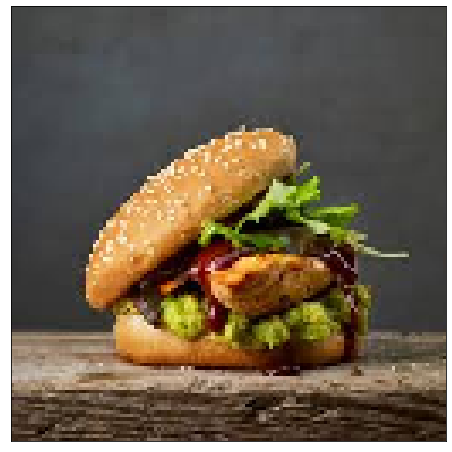

Burger


In [6]:
index_of_img = 3500
#display the first house's picture 
plt.figure(figsize = (8, 8))
plt.imshow(X[index_of_img, :, :, :])
plt.xticks([])
plt.yticks([])
plt.show()
lab = y.reshape(-1, 1)
print(le.inverse_transform(lab[index_of_img])[0])

In [7]:
unique, counts = np.unique(lab, return_counts=True)

In [8]:
le.inverse_transform([4])

array(['Hot Dog'], dtype='<U14')

In [9]:
dict(zip(unique, counts))

{0: 2000,
 1: 2000,
 2: 2000,
 3: 2000,
 4: 2000,
 5: 2000,
 6: 2000,
 7: 2000,
 8: 2000}

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)

In [16]:
num_classes = len(le.classes_)


Scaling

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)
print(X_test.shape)

(14400, 128, 128, 3)
(3600, 128, 128, 3)


In [13]:
Xlearn, Xvalidation, ylearn, yvalidation = train_test_split(X_train, y_train, test_size = 0.25,
                                                            random_state = 1234, shuffle = True,
                                                            stratify = y_train
                                                            )
print(Xlearn.shape, ylearn.shape, Xvalidation.shape, yvalidation.shape)

(10800, 128, 128, 3) (10800,) (3600, 128, 128, 3) (3600,)


In [14]:
le.classes_

array(['Baked Potato', 'Burger', 'Crispy Chicken', 'Fries', 'Hot Dog',
       'Pizza', 'Sandwich', 'Taco', 'Taquito'], dtype='<U14')

In [15]:
num_classes = len(le.classes_)
CNN_model = keras.models.Sequential([
    keras.layers.Input(shape = (X_train.shape[1], 
                                X_train.shape[2],
                                X_train.shape[3])),
    keras.layers.Conv2D(filters = 8, kernel_size = (3, 3),
                        strides = 1),
    keras.layers.Conv2D(filters = 8, kernel_size = (3, 3),
                        strides = 1, ),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.5),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2),
    keras.layers.Conv2D(filters = 8, kernel_size = (2, 2), 
                        strides = 1),
    keras.layers.Conv2D(filters = 8, kernel_size = (2, 2), 
                        strides = 1),
    keras.layers.Activation("relu"),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = "relu"),
    keras.layers.Dense(num_classes, activation = "softmax", kernel_regularizer = keras.regularizers.l2(l2 = 0.1))
])

In [16]:

# model = Sequential([
#   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

In [17]:
# compiled network
CNN_model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ["accuracy"])

In [18]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 8)       584       
                                                                 
 activation (Activation)     (None, 124, 124, 8)       0         
                                                                 
 dropout (Dropout)           (None, 124, 124, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 8)         264       
                                                        

In [19]:
monitor = EarlyStopping(monitor='val_accuracy', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)   

In [20]:
# learned network
start_time = time.time()
cnn_history = CNN_model.fit(X_train, y_train, epochs = 4, callbacks=[monitor],
                            validation_data = (Xvalidation, yvalidation),
                            batch_size = 32,
                            verbose = 1, 
                            )
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 1/4


c:\Users\locix\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


450/450 [==============================] - 61s 133ms/step - loss: 2.9548 - accuracy: 0.1087 - val_loss: 2.2120 - val_accuracy: 0.1094
Epoch 2/4
450/450 [==============================] - 62s 137ms/step - loss: 2.2029 - accuracy: 0.1073 - val_loss: 2.1993 - val_accuracy: 0.1117
Epoch 3/4
450/450 [==============================] - 60s 134ms/step - loss: 2.1987 - accuracy: 0.1074 - val_loss: 2.1980 - val_accuracy: 0.1117
Epoch 4/4
450/450 [==============================] - 62s 137ms/step - loss: 2.1985 - accuracy: 0.1108 - val_loss: 2.1979 - val_accuracy: 0.1114
Elapsed time: 249.96143674850464 seconds


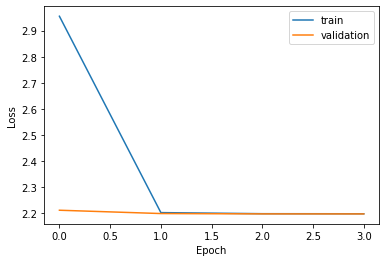

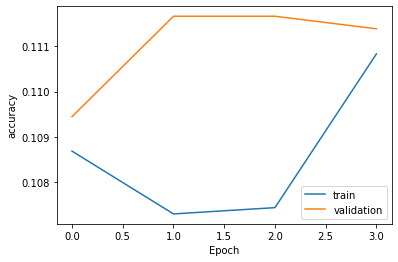

In [24]:
plt.plot(cnn_history.history["loss"])
plt.plot(cnn_history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','validation'])
plt.show()
plt.plot(cnn_history.history["accuracy"])
plt.plot(cnn_history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend(['train','validation'])
plt.show()

In [3]:
print(CNN_model.evaluate(Xlearn, ylearn))
print(CNN_model.evaluate(Xvalidation, yvalidation))
print(CNN_model.evaluate(X_test, y_test))

NameError: name 'CNN_model' is not defined

TRANSFER LEARN GOOGLE

In [21]:
# Bit 
from tensorflow_hub import KerasLayer as KL
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, InputLayer, Dropout
# Model URL
url = "https://tfhub.dev/google/bit/m-r50x1/1"

# Load Model
bit = KL(url)

# Model Name
model_name = "Fast-Food-Classification-BiT"


# Model Architecture
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    bit,
    Dropout(0.2),
    Dense(num_classes, activation='softmax', kernel_initializer='zeros')
], name=model_name)

# Model Summary
model.summary()

Model: "Fast-Food-Classification-BiT"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 2048)              23500352  
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 9)                 18441     
                                                                 
Total params: 23,518,793
Trainable params: 18,441
Non-trainable params: 23,500,352
_________________________________________________________________


In [22]:
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay as PwCD
from keras.callbacks import EarlyStopping as ES, ModelCheckpoint as MC
lr = 5e-3

lr_scheduler = PwCD(boundaries=[200,300,400],values=[lr*0.1, lr*0.01, lr*0.001, lr*0.0001])

opt = SGD(learning_rate=lr_scheduler, momentum=0.9)

# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)   

In [23]:
# Callbacks
cbs = [ES(patience=5, restore_best_weights=True), MC(model_name+".h5", save_best_only=True)]

# Training
history = model.fit(X_train, y_train, 
                        validation_data=(Xvalidation, yvalidation),
                        epochs=50,
                        callbacks=cbs,
                    )

Epoch 1/50
 83/450 [====>.........................] - ETA: 5:08 - loss: 0.9248 - accuracy: 0.7195

: 

: 

In [14]:
X_train.shape

(14400, 128, 128, 3)

TEST 2

In [15]:
num_classes = len(le.classes_)
pretrained_model_mobilenetv3 = tf.keras.applications.MobileNetV3Large(
    input_shape=(X_train.shape[1], 
                                X_train.shape[2],
                                X_train.shape[3]),
    include_top=False,
    weights=None,
    classes=num_classes
)
pretrained_model_mobilenetv3.trainable = True

In [16]:

def model_builder(hp): # <- hps = kt.HyperParameters()
    hp_units = hp.Int('units', min_value=128, max_value=4096, step=16)
    hp_dropout_rate = hp.Choice('rate', values=[0.3, 0.4, 0.5, 0.6])
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-5, 1e-6])
    
    model = Sequential([
            pretrained_model_mobilenetv3,
            GlobalAveragePooling2D(),
            Flatten(),
            Dense(units=hp_units, activation="relu"),
            Dropout(rate=hp_dropout_rate),
            Dense(num_classes, activation="softmax")])
        
    
#     model.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate),
#                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                 metrics=['accuracy', tf.keras.metrics.AUC()])
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ["accuracy"])
    return model

In [17]:
tuner = RandomSearch(model_builder,
                     objective='val_accuracy',
                     max_trials=20,
                     seed=20)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [18]:
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 20,
                               restore_best_weights = True)

In [19]:
Xvalidation.shape

(3600, 128, 128, 3)

In [20]:
tuner.search(X_train, y_train, validation_data=(Xvalidation, yvalidation), epochs=10, callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The hyperparameter search is complete. The optimal number of units in the first densely-connected
# layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
# is {best_hps.get('learning_rate')}, get dropout rate {best_hps.get('rate')}.
# """)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
3728              |?                 |units
0.4               |?                 |rate
0.001             |?                 |learning_rate

Epoch 1/10


c:\Users\locix\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend.py:5583: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "sparse_categorical_crossentropy"


450/450 [==============================] - 264s 576ms/step - loss: 2.4832 - accuracy: 0.1202 - val_loss: 2.1982 - val_accuracy: 0.1108
Epoch 2/10
450/450 [==============================] - 275s 612ms/step - loss: 2.1987 - accuracy: 0.1098 - val_loss: 2.1981 - val_accuracy: 0.1094
Epoch 3/10
 40/450 [=>............................] - ETA: 4:00 - loss: 2.1989 - accuracy: 0.1039

RESNET PRE-TRAINED MODEL

In [15]:
num_classes = len(le.classes_)

pretrained_model_resnet50 = tf.keras.applications.ResNet50(
    input_shape=(X_train.shape[1], 
                                X_train.shape[2],
                                X_train.shape[3]),
    include_top=False,
    weights=None,
    classes=num_classes
    )
pretrained_model_resnet50.trainable = True

In [47]:
def model_builder(hp): # <- hps = kt.HyperParameters()
    hp_units = hp.Int('units', min_value=128, max_value=4096, step=16)
    hp_dropout_rate = hp.Choice('rate', values=[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6])
    
    model = Sequential([
            pretrained_model_resnet50,
            GlobalAveragePooling2D(),
            Flatten(),
            Dense(units=hp_units, activation="relu"),
            Dropout(rate=hp_dropout_rate),
            Dense(num_classes, activation="softmax")])
        
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ["accuracy"])
                
    
    return model

In [48]:
tuner = RandomSearch(model_builder,
                     objective='val_accuracy',
                     max_trials=20,
                     seed=20)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [49]:
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 20,
                               restore_best_weights = True)

In [50]:
tuner.search(X_train, y_train, validation_data=(Xvalidation, yvalidation), epochs=100, callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}, get dropout rate {best_hps.get('rate')}.
""")


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
3728              |?                 |units
0.4               |?                 |rate
0.001             |?                 |learning_rate

Epoch 1/100
128/450 [=======>......................] - ETA: 10:13 - loss: 10.9701 - accuracy: 0.1191

In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.preprocessing import image
from sklearn.metrics import mean_squared_error
from keras_tuner.tuners import RandomSearch
#from keras.models import Sequential
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import time
import os

In [6]:
import os

X = np.load('data.npy', allow_pickle=True, fix_imports=True)
y = np.load('label.npy', allow_pickle=True, fix_imports=True)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [7]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [27]:
new_model = tf.keras.models.load_model('my_model-v1')

In [29]:
new_model.summary()

Model: "Fast-Food-Classification-BiT"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23500352  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 9)                 18441     
                                                                 
Total params: 23,518,793
Trainable params: 18,441
Non-trainable params: 23,500,352
_________________________________________________________________


In [128]:
# >>>>>EDIT HERE<<<<<
file_name = 'burger_test.png'

In [129]:
test_images = np.zeros((1,  128,  128, 3), dtype = "uint8")
food_img = image.load_img(f'../data/fast_food/test/{file_name}',target_size = (128,128))
test_images[0, 0:128, 0:128, :] = food_img


In [130]:
test_images.shape

(1, 128, 128, 3)

In [131]:
new_model.predict(test_images)

1/1 [==============================] - 0s 119ms/step


array([[6.1131941e-06, 9.9985504e-01, 1.7203781e-06, 5.2068404e-05,
        2.0133853e-06, 6.1650546e-08, 4.6865920e-05, 3.5311674e-05,
        7.3436337e-07]], dtype=float32)

1/1 [==============================] - 0s 119ms/step


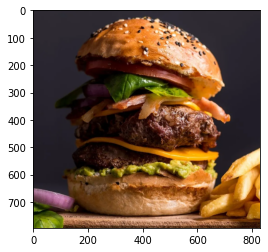

Burger


In [132]:
labels = np.unique(y)
index = np.argmax(new_model.predict(test_images))

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(f'../data/fast_food/test/{file_name}')
imgplot = plt.imshow(img)
plt.show()
print(labels[index])

In [121]:
labels

array(['Baked Potato', 'Burger', 'Crispy Chicken', 'Fries', 'Hot Dog',
       'Pizza', 'Sandwich', 'Taco', 'Taquito'], dtype='<U14')